In [102]:
## libraries used so far
# pandas -> info, head, hist, describe, plot, corr, tools.plotting->scatter_matrix
# sklearn -> model_selection->train_test_split|StratifiedShuffleSplit, 
# matplotlib -> pyplot, 
# numpy -> ceil
%config IPCompleter.greedy=True

In [2]:
HOUSING_PATH = "D:\\Studies\\Hands_on_ML_with_scikit_and_tensorflow\\chapter2\\datasets\\housing"


In [3]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    print("SUCCESS !!")
    return pd.read_csv(csv_path)
    


In [4]:
import pandas as pd
import os


In [5]:
housing = load_housing_data()

SUCCESS !!


In [6]:
housing.head() # ocean_proximit is a categorical variable


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing["housing_median_age"].value_counts()

52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: housing_median_age, dtype: int64

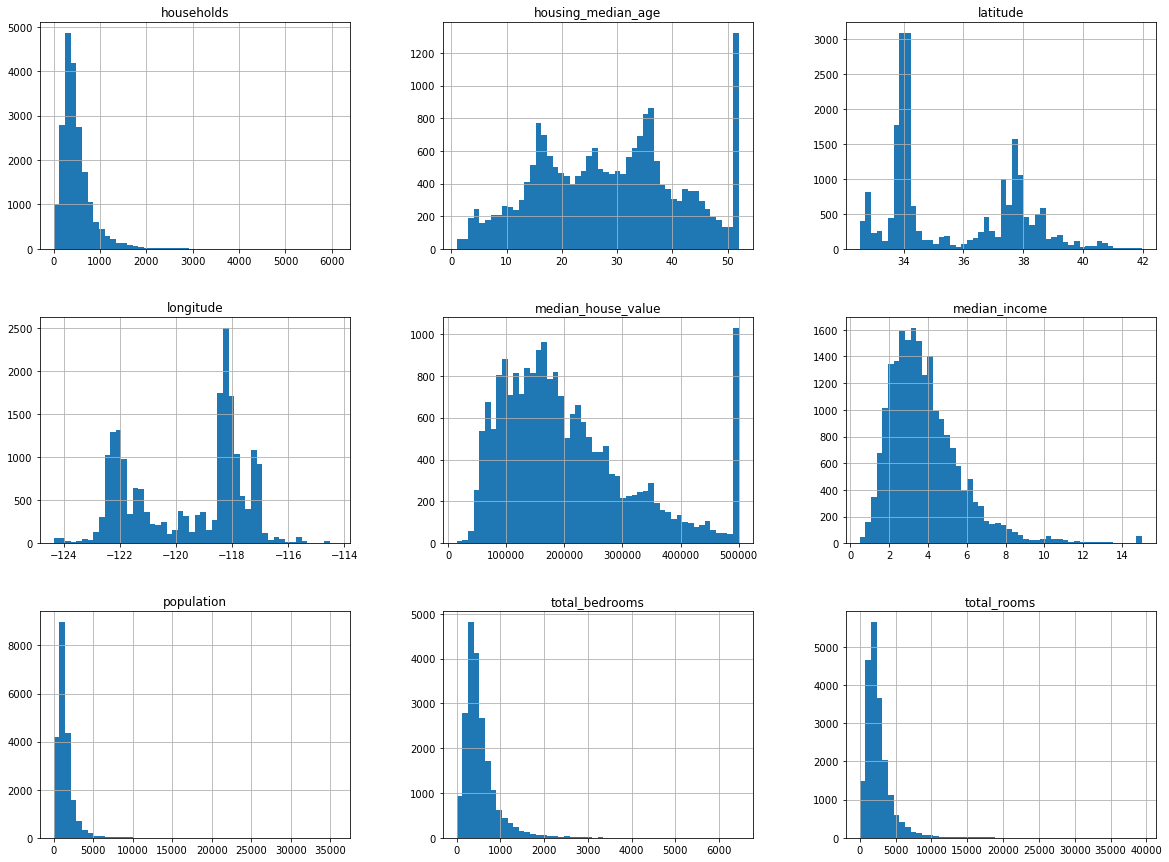

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15)) # check the input distributions , ex= normal, gaussian, 
plt.show()

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [22]:
# Create a test set, we should keep test set away before further analyzing the data to avoid DATA SNOOPING BIAS
import numpy as np 
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) # pure random sampling 

In [23]:
# how to pick train, test sets based on median income distribution 
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
print(housing["income_cat"].head())
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
print(housing["income_cat"].head())

0    6.0
1    6.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64
0    5.0
1    5.0
2    5.0
3    4.0
4    3.0
Name: income_cat, dtype: float64


In [24]:

from sklearn.model_selection import StratifiedShuffleSplit # split according to the 
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    print(train_index)
    print(test_index)
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

[17606 18632 14650 ..., 13908 11159 15775]
[ 5241 10970 20351 ...,  4019 12107  2398]


In [25]:
# compare test set distribuiton in both random and startified selection 
print(housing["income_cat"].value_counts()/len(housing))
print(test_set["income_cat"].value_counts()/len(test_set))
print(strat_test_set["income_cat"].value_counts()/len(strat_test_set))


3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64
3.0    0.358527
2.0    0.324370
4.0    0.167393
5.0    0.109496
1.0    0.040213
Name: income_cat, dtype: float64
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64


In [26]:
# remove income category feature from both train and test set 
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

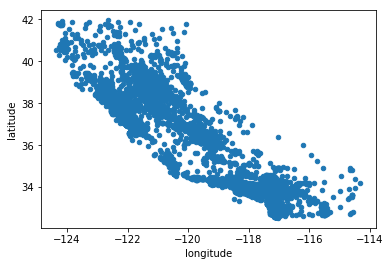

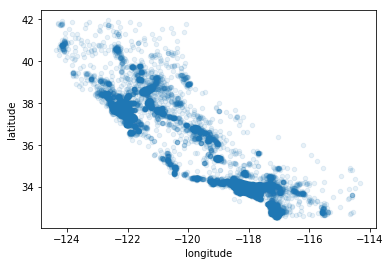

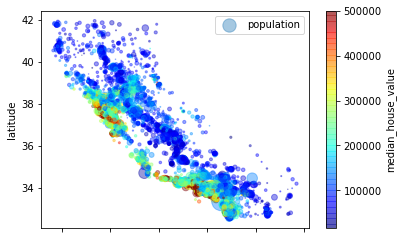

In [27]:
## EXPLORITORY DATA ANALYSIS  to gain insights 
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=1) # is like a parameter to control the transparancy of points
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
# s - controls the point size 
# c - controls  the point color
# plot with 4 variables 
# house price very much related to the location and the population density 


In [28]:
## FIND CORRELATIONS BETWEEN INPUT FEATURES AND OUT PUT CLASS (Linear corellation)
# total_rooms --> total_bedrooms, population, households
# meadian_income --> median_house_value, 
corr_matrix = housing.corr()


In [29]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1D5AE39E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E1D8BBCFD0>]], dtype=object)

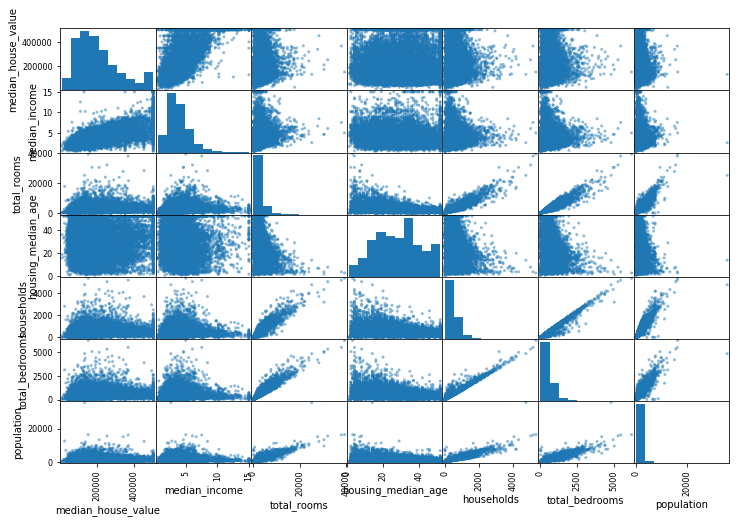

In [30]:
from pandas.tools.plotting import scatter_matrix
attr = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "households", "total_bedrooms", "population"]
scatter_matrix(housing[attr], figsize=(12,8))
# Most promising - Median income

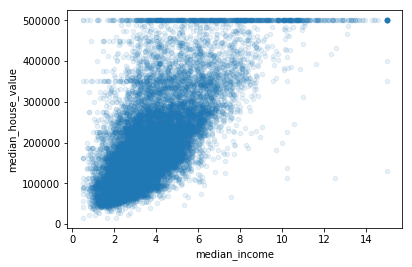

In [31]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
# Horizontal lines at 500k, 450k, 350k, 280k --> remove those districts to avoid creating data quirks

In [32]:
# Experimenting with feature combinations 
# rooms per household
# bedrooms per room
# population per household 
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]



In [33]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [85]:
"""
So far - 
* frame problems
* define performance measure
* Load data 
* Analyze the distribution of features 
* train, test selection 
* EDA - correlation, scatter plots, find preprocessed or croped values of features, anomalies in distribution 
* experiment different feature combinations 
* handeling missing values
"""
## Prepare data for machine learning algorithms 
# no need to apply same transforation to both features and labels 
# 1. Handling missing values 

from sklearn.preprocessing import Imputer

housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()
imputer = Imputer(strategy='median')
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
print(imputer.statistics_)
print(housing_num.median().values)

[ -118.51      34.26      29.      2119.5      433.      1164.       408.
     3.5409]
[ -118.51      34.26      29.      2119.5      433.      1164.       408.
     3.5409]


In [86]:
X = imputer.transform(housing_num) # numpy arry
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [87]:
## Handeling categorical variables 
from sklearn.preprocessing import LabelEncoder #lab
from sklearn.preprocessing import OneHotEncoder # return scipy sparse matrix
from sklearn.preprocessing import LabelBinarizer # Retrun numpy array with many zeros

encoder = LabelBinarizer()
housing_cat = housing["ocean_proximity"]
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot





array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [88]:
"""
So far - 
* frame problems
* define performance measure
* Load data 
* Analyze the distribution of features 
* train, test selection 
* EDA - correlation, scatter plots, find preprocessed or croped values of features, anomalies in distribution 
* experiment different feature combinations 
* handeling missing values
* handel categorical variables - label encoding, onehot encoding
* Writing custom feature transformation using sklearn
"""
# HOW TO CREATE A CUSTOM TRANSFORMATION USING SCIKTLEARN API
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedroom_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self # nothing to do 
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedroom_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        return np.c_[X, rooms_per_household, population_per_household]


    

In [89]:
# execute the class 
attr_addr = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attr = attr_addr.transform(housing.values)

In [90]:
ll = np.concatenate((housing.columns, ['rooms_per_household', 'population_per_household']), axis=0)
ll


array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'population_per_household'], dtype=object)

In [91]:
husing_attr_extra = pd.DataFrame(housing_extra_attr, columns= ll)

In [92]:
husing_attr_extra.head()
print(list(housing_num))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


In [93]:
"""
So far - 
* frame problems
* define performance measure
    - ex: RMSE 
* Load data 
    - import pandas as pd (read_csv)
    - import os
* Analyze the distribution of features 
    - import matplotlib.pyplot as plt 
    - import pandas as pd (head, describe, value_counts, hist  )
* train, test selection 
    - import numpy as np 
    - from sklearn.model_selection import train_test_split
    - from sklearn.model_selection import StratifiedShuffleSplit
* EDA - correlation, scatter plots, find preprocessed or croped values of features, anomalies in distribution 
    - import pandas as pd (corr, plot)
    - from pandas.tools.plotting import scatter_matrix
    - import matplotlib.pyplot as plt (get_cmap)
* experiment different feature combinations 
* handeling missing values
    - from sklearn.preprocessing import Imputer
* handel categorical variables - label encoding, onehot encoding
    - from sklearn.preprocessing import LabelEncoder #lab
    - from sklearn.preprocessing import OneHotEncoder # return scipy sparse matrix
    - from sklearn.preprocessing import LabelBinarizer
* Writing custom feature transformation using sklearn
    - from sklearn.base import BaseEstimator, TransformerMixin
* Feature scaling - normalization(min - max)- not good with outliers , standardization(zero mean, unit variance )
    - from sklearn.preprocessing import StandardScaler 
* transformation piplines 
    - from sklearn.pipeline import Pipeline
    - from sklearn.pipeline import FeatureUnion
"""

#Transformation pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler 

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names 
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #print(self.attribute_names)
        #print(X.head())
        return X[self.attribute_names].values
    
num_attr = list(housing_num)
cat_attr = ['ocean_proximity']

num_pipeline = Pipeline( [
    ('selector', DataFrameSelector(num_attr)),
    ('imputer', Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
    
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attr)),
    ('label_binerizer', LabelBinarizer() )
    ])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [94]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [101]:
"""
So far - 
%config IPCompleter.greedy=True
* frame problems
* define performance measure
    - ex: RMSE 
* Load data 
    - import pandas as pd (read_csv)
    - import os
* Analyze the distribution of features 
    - import matplotlib.pyplot as plt 
    - import pandas as pd (head, describe, value_counts, hist  )
* train, test selection 
    - import numpy as np 
    - from sklearn.model_selection import train_test_split
    - from sklearn.model_selection import StratifiedShuffleSplit
* EDA - correlation, scatter plots, find preprocessed or croped values of features, anomalies in distribution 
    - import pandas as pd (corr, plot)
    - from pandas.tools.plotting import scatter_matrix
    - import matplotlib.pyplot as plt (get_cmap)
* experiment different feature combinations 
* handeling missing values
    - from sklearn.preprocessing import Imputer
* handel categorical variables - label encoding, onehot encoding
    - from sklearn.preprocessing import LabelEncoder #lab
    - from sklearn.preprocessing import OneHotEncoder # return scipy sparse matrix
    - from sklearn.preprocessing import LabelBinarizer
* Writing custom feature transformation using sklearn
    - from sklearn.base import BaseEstimator, TransformerMixin
* Feature scaling - normalization(min - max)- not good with outliers , standardization(zero mean, unit variance )
    - from sklearn.preprocessing import StandardScaler 
* transformation piplines 
    - from sklearn.pipeline import Pipeline
    - from sklearn.pipeline import FeatureUnion
* training and evaluating the training set
    - from sklearn.linear_model import LinearRegression
* Find the error of training - ex: RMSE --> underfit --> complex model, more features, reduce constraints
    - from sklearn.metrics import mean_squared_error
* Better evaluation using cross validation
    - from sklearn.model_selection import cross_val_score
* Run validation on multiple models and select good models
    - from sklearn.tree import DecisionTreeRegressor
    - from sklearn.ensemble import RandomForestRegressor
"""

## TRAINING AND EVALUATING THE TRAINING SET
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

#print(housing_labels.shape)
#print(housing_prepared.shape)
#print(housing.info())

lin_reg.fit(housing_prepared, housing_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
some_data = housing.iloc[:5]
some_labels  = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
print(lin_reg.predict(some_data_prepared))
print(some_labels)

[ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]
17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64


In [112]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)


68628.1981985


In [113]:
# chose a different model and see -> Decision tree regression 
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
        

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [115]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions, housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse # badly overfit ??

0.0

In [116]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [117]:
def display_scores(scores):
    print("Scores: " , scores)
    print("mean: ", scores.mean())
    print("SD: ", scores.std())
    return

In [119]:
display_scores(rmse_scores)

Scores:  [ 69532.22365604  66934.51404819  71849.99610434  70802.6643617
  70314.47787238  75090.98297782  70755.66976772  69592.13090132
  75713.4526102   68531.66545562]
mean:  70911.7777755
SD:  2586.95443424


In [120]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

Scores:  [ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
mean:  69052.4613635
SD:  2731.6740018


In [121]:
# RandomForestRegressor 
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)


Scores:  [ 52302.58459178  50455.89315396  52133.76122447  55153.84230531
  52306.77021225  56312.1058984   51684.93094372  50730.53428695
  55226.1056865   52182.63725386]
mean:  52848.9165557
SD:  1899.31921407


In [122]:
"""
So far - 
%config IPCompleter.greedy=True
* frame problems
* define performance measure
    - ex: RMSE 
* Load data 
    - import pandas as pd (read_csv)
    - import os
* Analyze the distribution of features 
    - import matplotlib.pyplot as plt 
    - import pandas as pd (head, describe, value_counts, hist  )
* train, test selection 
    - import numpy as np 
    - from sklearn.model_selection import train_test_split
    - from sklearn.model_selection import StratifiedShuffleSplit
* EDA - correlation, scatter plots, find preprocessed or croped values of features, anomalies in distribution 
    - import pandas as pd (corr, plot)
    - from pandas.tools.plotting import scatter_matrix
    - import matplotlib.pyplot as plt (get_cmap)
* experiment different feature combinations 
* handeling missing values
    - from sklearn.preprocessing import Imputer
* handel categorical variables - label encoding, onehot encoding
    - from sklearn.preprocessing import LabelEncoder #lab
    - from sklearn.preprocessing import OneHotEncoder # return scipy sparse matrix
    - from sklearn.preprocessing import LabelBinarizer
* Writing custom feature transformation using sklearn
    - from sklearn.base import BaseEstimator, TransformerMixin
* Feature scaling - normalization(min - max)- not good with outliers , standardization(zero mean, unit variance )
    - from sklearn.preprocessing import StandardScaler 
* transformation piplines 
    - from sklearn.pipeline import Pipeline
    - from sklearn.pipeline import FeatureUnion
* training and evaluating the training set
    - from sklearn.linear_model import LinearRegression
* Find the error of training - ex: RMSE --> underfit --> complex model, more features, reduce constraints
    - from sklearn.metrics import mean_squared_error
* Better evaluation using cross validation
    - from sklearn.model_selection import cross_val_score
* Run validation on multiple models and select good models
    - from sklearn.tree import DecisionTreeRegressor
    - from sklearn.ensemble import RandomForestRegressor
* save trained models 
    - from skleran.externels import joblib
* Fine tune selected models - Grid Search , Randomized Search 
    - from sklearn.model_selection import GridSearchCV
    - from sklearn.model_selection import RandomizedSearchCV
    - from scipy.stats import randint as sp_randint
* Evaluat the system on test set
* Launch, monitor and maintain the system
"""

# Fine tune model with Grid search, randomized search, ensembel models 
from sklearn.model_selection import GridSearchCV
params_grid = [
    { 'n_estimators': [3, 10, 30], 'max_features':[2,4,6,8]}, 
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2,3,4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, params_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [149]:
feature_importance = grid_search.best_estimator_.feature_importances_
extra_attr = ['rooms_per_hhold','pop_per_hhold','bedrooms_per_room']
onehot_attr = list(encoder.classes_)
attr = num_attr + extra_attr + onehot_attr
sorted(zip(feature_importance, attr), reverse=True)

[(0.29941823636244541, 'median_income'),
 (0.1699045924165081, 'INLAND'),
 (0.1084262272731947, 'pop_per_hhold'),
 (0.076980217254901229, 'longitude'),
 (0.073787297270759292, 'bedrooms_per_room'),
 (0.071770158189072938, 'rooms_per_hhold'),
 (0.071413674982916578, 'latitude'),
 (0.043465088202042659, 'housing_median_age'),
 (0.01687833096410337, 'total_bedrooms'),
 (0.016831801791665751, 'population'),
 (0.016814251293345059, 'total_rooms'),
 (0.016446166733077739, 'households'),
 (0.011379198988044121, '<1H OCEAN'),
 (0.004050473727632945, 'NEAR OCEAN'),
 (0.0023723880321360308, 'NEAR BAY'),
 (6.1896518154110918e-05, 'ISLAND')]

In [143]:
cvres1 = grid_search.cv_results_
#print(cvres1)
for mean_score, params in zip(cvres1["mean_test_score"], cvres1["params"]):
    print(np.sqrt(-mean_score), params)

64619.1691779 {'max_features': 2, 'n_estimators': 3}
55477.9062744 {'max_features': 2, 'n_estimators': 10}
52770.5580628 {'max_features': 2, 'n_estimators': 30}
60262.5063708 {'max_features': 4, 'n_estimators': 3}
52974.9364778 {'max_features': 4, 'n_estimators': 10}
50698.7078573 {'max_features': 4, 'n_estimators': 30}
59495.2671695 {'max_features': 6, 'n_estimators': 3}
52199.3897506 {'max_features': 6, 'n_estimators': 10}
49962.6220091 {'max_features': 6, 'n_estimators': 30}
58713.581206 {'max_features': 8, 'n_estimators': 3}
51812.9522708 {'max_features': 8, 'n_estimators': 10}
50005.7338741 {'max_features': 8, 'n_estimators': 30}
63323.2056598 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54621.7500149 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59767.1642816 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52826.5639864 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
59117.7974298 {'bootstrap': False, 'max_features': 4, 'n_estima

In [ ]:
# Analayze best models and their errors 
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances_

In [142]:
# Randomized search - When the search space is very large 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
param_grid = {'n_estimators': sp_randint(28, 31), 'max_features':sp_randint(5,6), 'bootstrap': [True, False]}


random_search = RandomizedSearchCV(forest_reg, param_distributions=param_grid, n_iter=100, cv=5)
random_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E1DB5B5668>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E1DB5E82E8>, 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [144]:
random_search.best_params_

{'bootstrap': False, 'max_features': 5, 'n_estimators': 30}

In [145]:
cvres = random_search.cv_results_
print(cvres)
#for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#    print(np.sqrt(mean_score), params)

{'split0_test_score': array([ 0.81856417,  0.81273976,  0.81625268,  0.82082191,  0.81655101,
        0.81286252,  0.8222496 ,  0.82147029,  0.81171552,  0.82353565,
        0.82161792,  0.81999817,  0.82091476,  0.81017744,  0.82225881,
        0.81297654,  0.82188057,  0.81354066,  0.81269596,  0.8145776 ,
        0.82044444,  0.81629188,  0.81641132,  0.81775637,  0.81845265,
        0.82403282,  0.81509436,  0.82154675,  0.81624039,  0.82343492,
        0.81969319,  0.81691931,  0.81314597,  0.81477123,  0.82012647,
        0.81615006,  0.81334152,  0.81478182,  0.82359302,  0.81809101,
        0.82315487,  0.81770888,  0.81305699,  0.82161087,  0.81407651,
        0.81952409,  0.81241967,  0.81600413,  0.8199828 ,  0.8114505 ,
        0.8228798 ,  0.80834966,  0.8133023 ,  0.81535578,  0.82008677,
        0.82293725,  0.82416716,  0.81639995,  0.81782176,  0.81359103,
        0.82391282,  0.81505202,  0.81846412,  0.81171884,  0.81367479,
        0.81776978,  0.81204032,  0.816201

In [150]:
feature_importance  = random_search.best_estimator_.feature_importances_
extra_attr = ['rooms_per_hhold','pop_per_hhold','bedrooms_per_room']
onehot_attr = list(encoder.classes_)
attr = num_attr + extra_attr + onehot_attr
sorted(zip(feature_importance, attr), reverse=True)

[(0.28788131242566978, 'median_income'),
 (0.15247003537879469, 'INLAND'),
 (0.10500198173608806, 'bedrooms_per_room'),
 (0.10395336986355769, 'pop_per_hhold'),
 (0.088770638134033047, 'longitude'),
 (0.075541304069649984, 'latitude'),
 (0.042404590005291357, 'rooms_per_hhold'),
 (0.041240572841333423, 'housing_median_age'),
 (0.019613030587804278, 'population'),
 (0.01906946294763966, 'total_rooms'),
 (0.01808051516990548, '<1H OCEAN'),
 (0.017406430331936795, 'total_bedrooms'),
 (0.017043095384060184, 'households'),
 (0.0062090314894502055, 'NEAR OCEAN'),
 (0.0051930044720366738, 'NEAR BAY'),
 (0.00012162516274873471, 'ISLAND')]

In [152]:
final_model_1 = grid_search.best_estimator_
final_model_2 = random_search.best_estimator_

x_test = strat_test_set.drop("median_house_value", axis=1 )
y_test = strat_test_set["median_house_value"].copy()

x_test_prepared = full_pipeline.transform(x_test)
pred_1 = final_model_1.predict(x_test_prepared)
pred_2 = final_model_2.predict(x_test_prepared)

mse_1 = mean_squared_error(y_test, pred_1)
rmse_1 = np.sqrt(mse_1)
mse_2 = mean_squared_error(y_test, pred_2)
rmse_2 = np.sqrt(mse_2)
print(rmse_1)
print(rmse_2)


47652.2612644
47165.5731477


In [155]:
x = True 
y = True
np.abs(x - y).max()

0